Assignment 1: 

Name: Jeffin Johny Kachappilly

UID: 118293929

Please submit to Gradescope
- a PDF containing all outputs (by executing **Run all**)
- your ipynb notebook containing all the code

I understand the policy on academic integraty (collaboration and the use of online material).
Please sign your name here: Jeffin Johny Kachappilly


# Part A: Hybrid Image (25 Points)

## Overview

A hybrid image is the sum of a *low-pass filtered* version of the one image and a *high-pass filtered* version of a second image. There is a free parameter, which can be tuned for each image pair, which controls how much high frequency to remove from the first image and how much low frequency to leave in the second image. This is called the “cutoff-frequency”. In the paper it is suggested to use two cutoff frequencies (one tuned for each image) and you are free to try that, as well. In the starter code, the cutoff frequency is controlled by changing the standard deviation of the Gausian filter used in constructing the hybrid images. [This](https://drive.google.com/uc?id=187FjBJLwnYXhylx08Vdh1SAA3AO-imYv) is the sample example.

NOTE: 

1. Reading [this](https://stanford.edu/class/ee367/reading/OlivaTorralb_Hybrid_Siggraph06.pdf) will help in understanding Part A.

2. You can use any image processing libraries of your choice such as skimage or cv2; in python.

We provided 7 pairs of aligned images. The alignment is important because it affects the perceptual grouping (read the paper for details). We encourage you to create additional examples (e.g. change of expression, morph between different objects, change over time, etc.).

You are required to provide **THREE hybrid image results** and for ONE of your favorite result, please provide answers to the following **FOUR sub-parts** mentioned in the write-up.

## Data

**WARNING: Colab deletes all files everytime runtime is disconnected. Make sure to re-download the inputs when it happens.**

In [19]:
# Download Data -- run this cell only one time per runtime
!gdown 1KTDxPAkQam29YKtoX5dKPnLKpUOWCanC
!unzip "/content/hybrid_pyramid_input.zip" -d "/content/"

Downloading...
From: https://drive.google.com/uc?id=1KTDxPAkQam29YKtoX5dKPnLKpUOWCanC
To: /content/hybrid_pyramid_input.zip
100% 2.19M/2.19M [00:00<00:00, 238MB/s]
Archive:  /content/hybrid_pyramid_input.zip
replace /content/data/Afghan_girl_before.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


## Code

In [20]:
# Helper Functions

def vis_hybrid_image(hybrid_image):
  scales = 5
  scale_factor = 0.5
  padding = 5
  original_height = hybrid_image.shape[0]
  num_colors = hybrid_image.shape[2] # counting how many color channels the input has
  output = hybrid_image
  cur_image = hybrid_image

  for i in range(2, scales):
      # add padding
      output = np.concatenate((output, np.ones((original_height, padding, num_colors), dtype=int)), axis=1)      
      # dowsample image;
      width = int(cur_image.shape[1] * scale_factor)
      height = int(cur_image.shape[0] * scale_factor)
      dim = (width, height)
      cur_image = cv2.resize(cur_image, dim, interpolation = cv2.INTER_LINEAR)
      # pad the top and append to the output
      tmp = np.concatenate((np.ones((original_height-cur_image.shape[0], cur_image.shape[1], num_colors)), cur_image), axis=0)
      output = np.concatenate((output, tmp), axis=1)
  
  output = (output * 255).astype(np.uint8)
  return output

def read_image(image_path):
  image = cv2.imread(image_path )
  # Converting BGR color to RGB color format
  RGB_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  return RGB_img

def gaussian_2D_filter(img ,size, cutoff_frequency):
  filter = cv2.GaussianBlur(img, (size,size) , cutoff_frequency)
  return filter

def imgfilter(image, filter):
  # USING GAUSSIAN BLUR AS INSTRUCTED BY PROF
  pass

def log_mag_FFT(image):
  mag = np.log(np.abs(np.fft.fftshift(np.fft.fft2(image))))
  return mag

<Figure size 432x288 with 0 Axes>

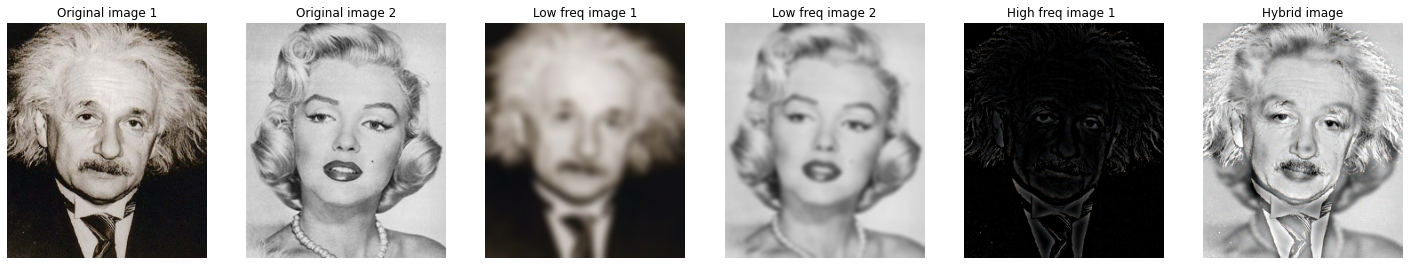

<Figure size 432x288 with 0 Axes>

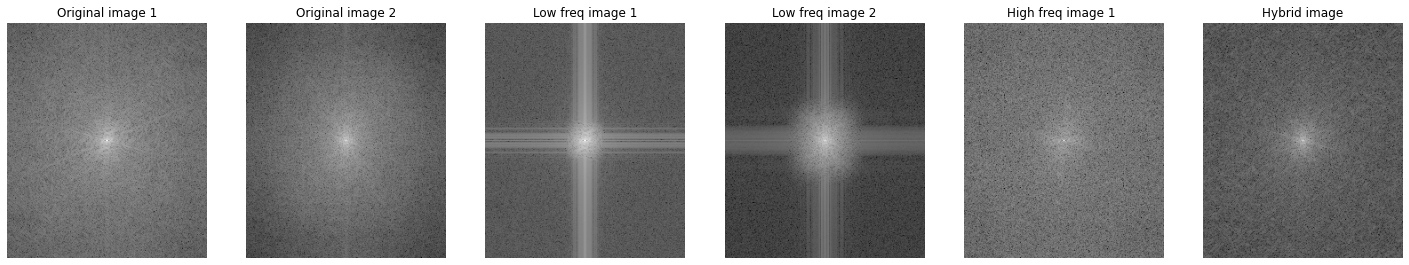

<Figure size 432x288 with 0 Axes>

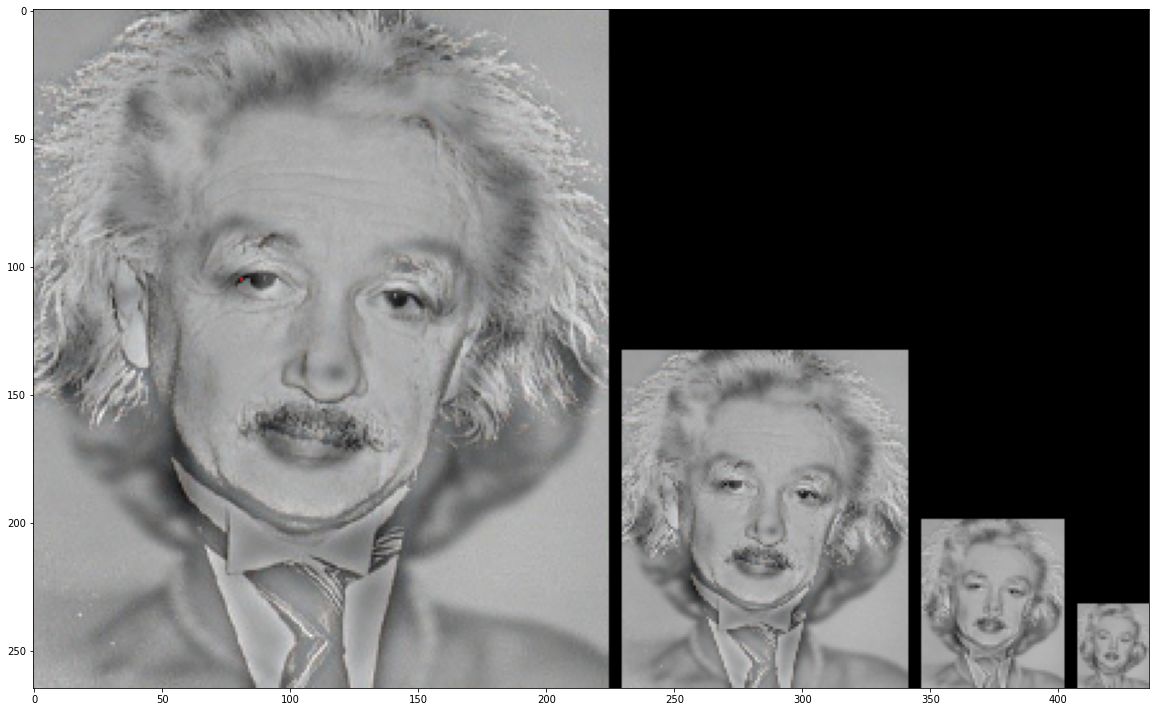

In [21]:
# Import necessary packages here
import cv2
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.fft import *
from google.colab.patches import cv2_imshow

image_path1 = '/content/data/einstein.bmp'
image_path2 = '/content/data/marilyn.bmp'

# image_path1 = '/content/data/Afghan_girl_after.jpg'
# image_path2 = '/content/data/Afghan_girl_before.jpg'

image_1 = read_image(image_path1)
image_2 = read_image(image_path2)


# YOUR CODE HERE: TUNE cutoff_frequency
cutoff_frequency_1 = 4
filter_size_1 = cutoff_frequency_1*4+1

cutoff_frequency_2 = 2
filter_size_2 = cutoff_frequency_2*4+1
"""cutoff_frequency is the standard deviation, in pixels, of the 
Gaussian blur that will remove the high frequencies from one image (image_1) and 
remove the low frequencies from another image (image_2) (to do so, subtract a blurred
version from the original version). You will want to tune this for every image pair to get the best results."""


"""Use imgfilter() to create 'low_frequencies' and 'high_frequencies' and then combine them to create 'hybrid_image'.
Remove the high frequencies from image_1 by blurring it. The amount of blur that works best will vary with different image pairs."""

low_freq_image1 = gaussian_2D_filter(image_1, filter_size_1, cutoff_frequency_1)
low_freq_image2 = gaussian_2D_filter(image_2 , filter_size_2, cutoff_frequency_2)

"""Remove the low frequencies from image_2. The easiest way to do this is to
subtract a blurred version of image_2 from the original version of image_2.
This will give you an image centered at zero with negative values."""

high_freq_image1 = np.int32(image_1) - np.int32(low_freq_image1)

"""Combine the high frequencies and low frequencies to obtain hybrid_image."""

hybrid = high_freq_image1 + np.int32(low_freq_image2)

"""Firstly, visualize low_frequencies, high_frequencies, and the hybrid image."""
plt.figure()
plt.figure(figsize = (25, 25))
plt.subplot(1,6,1),plt.imshow(image_1,cmap = 'gray')
plt.title('Original image 1')
plt.axis('off')
plt.subplot(1,6,2),plt.imshow(image_2,cmap = 'gray')
plt.title('Original image 2')
plt.axis('off')
plt.subplot(1,6,3),plt.imshow(low_freq_image1 ,cmap = 'gray')
plt.title('Low freq image 1')
plt.axis('off')
plt.subplot(1,6,4),plt.imshow(low_freq_image2 ,cmap = 'gray')
plt.title('Low freq image 2')
plt.axis('off')
plt.subplot(1,6,5),plt.imshow(high_freq_image1 ,cmap = 'gray')
plt.title('High freq image 1 ')
plt.axis('off')
plt.subplot(1,6,6),plt.imshow(hybrid ,cmap = 'gray')
plt.title('Hybrid image')
plt.axis('off')

"""Secondly, also visualize log magnitude of Fourier Transform of the above.
HINT: You may use np.log(np.abs(np.fft.fftshift(np.fft.fft2(image)))) to achieve it."""
image_1_gray = cv2.cvtColor(image_1, cv2.COLOR_RGB2GRAY)
image_2_gray = cv2.cvtColor(image_2, cv2.COLOR_RGB2GRAY)
low_freq_image1_gray = cv2.cvtColor(low_freq_image1, cv2.COLOR_RGB2GRAY)
low_freq_image2_gray = cv2.cvtColor(low_freq_image2, cv2.COLOR_RGB2GRAY)
high_freq_image1_gray = cv2.cvtColor(high_freq_image1.astype(np.uint8), cv2.COLOR_RGB2GRAY)
hybrid_gray = cv2.cvtColor(hybrid.astype(np.uint8), cv2.COLOR_RGB2GRAY)

FFT_image_1 = log_mag_FFT(image_1_gray)
FFT_image_2 = log_mag_FFT(image_2_gray)
FFT_image_1_low_freq = log_mag_FFT(low_freq_image1_gray)
FFT_image_2_low_freq = log_mag_FFT(low_freq_image2_gray)
FFT_image_1_high_freq = log_mag_FFT(high_freq_image1_gray.astype(np.uint8))
FFT_image_hybrid = log_mag_FFT(hybrid_gray.astype(np.uint8))

plt.figure()
plt.figure(figsize = (25, 25))
plt.subplot(1,6,1),plt.imshow(FFT_image_1,cmap = 'gray')
plt.title('Original image 1')
plt.axis('off')
plt.subplot(1,6,2),plt.imshow(FFT_image_2,cmap = 'gray')
plt.title('Original image 2')
plt.axis('off')
plt.subplot(1,6,3),plt.imshow(FFT_image_1_low_freq ,cmap = 'gray')
plt.title('Low freq image 1')
plt.axis('off')
plt.subplot(1,6,4),plt.imshow(FFT_image_2_low_freq ,cmap = 'gray')
plt.title('Low freq image 2')
plt.axis('off')
plt.subplot(1,6,5),plt.imshow(FFT_image_1_high_freq ,cmap = 'gray')
plt.title('High freq image 1 ')
plt.axis('off')
plt.subplot(1,6,6),plt.imshow(FFT_image_hybrid ,cmap = 'gray')
plt.title('Hybrid image')
plt.axis('off')

"""Thirdly, visualize hybrid_image_scale using helper function vis_hybrid_image.
Lastly, save all your outputs."""

visual_hybrid = hybrid + abs(np.min(hybrid))
final_hybrid = np.uint8( ( (visual_hybrid)/np.max(visual_hybrid) )*255 )
rgb_color = 255 - vis_hybrid_image(final_hybrid)
plt.figure()
plt.figure(figsize = (20, 20))
plt.imshow(rgb_color , cmap = 'gray')
plt.show()




## **Write-up**


1.   Provide the original and filtered images.
2.   Provide the the hybrid image and hybrid_image_scale using given helper function *vis_hybrid_image*.
3.   Log magnitude of the Fourier transform of the two original images, the filtered images, and the hybrid image.
4.   Briefly explain how this works, using your favorite results as illustrations.

# Answers
# Hybrid Images :[hybrid](https://drive.google.com/drive/folders/1VTF2tFwwRsjJ1-yYAfTba_QyHrnVup7W?usp=sharing)

1. [original and others](https://drive.google.com/file/d/1KBGzZDhupXvuLVUIBodn-cHmUgCrQOu0/view?usp=sharing)
2. [chosen hybrid](https://drive.google.com/file/d/13QScw5V_xwowojhP0FQlhTt_1TrBlyuS/view?usp=sharing)

3.   [FFT](https://drive.google.com/file/d/1RMB8zl5vVfx9n7CgQQBL2wzOcC_LJbFE/view?usp=sharing)
4. * THis works by the addition of a low frequency image and high freq image, and resultant hybrid image is perceived as any of the individual image according to viewing distance.
  * both the images dhould be similar size like monroe and einstein imge. The image with more pattern is chosen tobe high frequency image
  * When viewed nearer, humans want to perceive recognizable pattern. So recognize these patterns.
  * But the further we move away from hybrid, the more difficult it is to recognise these patterns. So after a certain distance the brain recognises the background image.


# Part B: Pyramid Image (25 Points)

## Overview
Choose an image that has interesting variety of textures (from Flickr or your own images). The images should be atleast 640X480 pixels and converted to grayscale. Write code for a Gaussian and Laplacian pyramid of level N (use for loops). In each level, the resolution should be reduced by a factor of 2. Show the pyramids for your chosen image in your write-up. Here is an [example](https://drive.google.com/uc?id=17Y287EA-GJ2z0wtm_M7StIWsXyFeHvrz).

## Data

**WARNING: Colab deletes all files everytime runtime is disconnected. Make sure to re-download the inputs when it happens.**

In [22]:
# Download Data -- run this cell only one time per runtime
!gdown 1KTDxPAkQam29YKtoX5dKPnLKpUOWCanC
!unzip "/content/hybrid_pyramid_input.zip" -d "/content/"

Downloading...
From: https://drive.google.com/uc?id=1KTDxPAkQam29YKtoX5dKPnLKpUOWCanC
To: /content/hybrid_pyramid_input.zip
100% 2.19M/2.19M [00:00<00:00, 235MB/s]
Archive:  /content/hybrid_pyramid_input.zip
replace /content/data/Afghan_girl_before.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


## Code

In [23]:
# Populate Helper Functions:

def pyramidsGL(image, num_levels):
  ''' Creates Gaussian (G) and Laplacian (L) pyramids of level "num_levels" from image im. 
  G and L are list where G[i], L[i] stores the i-th level of Gaussian and Laplacian pyramid, respectively. '''
  G = []
  L = []
  original_img = np.copy(input_image)
  G.append(input_image)
  for i in range(num_levels - 1):
      Gaussian = cv2.GaussianBlur(original_img, (3, 3), 0)
      original_img = cv2.resize( Gaussian, (Gaussian.shape[1]//2 , Gaussian.shape[0]//2), interpolation = cv2.INTER_NEAREST)
      G.append(original_img)

  for j in range(num_levels):
      if j!= num_levels-1:
          big_gaussian = cv2.resize( G[j+1], (G[j].shape[1] , G[j].shape[0]), interpolation = cv2.INTER_NEAREST)
          subtract = np.int32(G[j]) - np.int32(cv2.GaussianBlur(big_gaussian, (3, 3), 0)) 
          L.append(subtract)
      else:
          L.append(G[j]) 

  return G, L

def displayPyramids(G, L):
  '''Role of this function is to display intensity and Fast Fourier Transform (FFT) images of pyramids.
  NOTE: You may re-use your helper function  "log_mag_FFT" to compute this.'''
  plt.figure()
  plt.figure(figsize = (25, 25))
  for i in range(1 , 11):
      if i < 6:
          plt.subplot(2,5,i),plt.imshow(Gaussian_pyr[i-1],cmap = 'gray')
      else :
          plt.subplot(2 , 5 , i),plt.imshow(Laplacian_pyr[i-6],cmap = 'gray')

  plt.figure()
  plt.figure(figsize = (25, 25))
  for i in range(1 , 11):
      if i < 6:
          gaus_mag = np.log(np.abs(np.fft.fftshift(np.fft.fft2(Gaussian_pyr[i-1]))))
          plt.subplot(2,5,i),plt.imshow(gaus_mag ,cmap = 'winter')
      else :
          lap_mag = np.log(np.abs(np.fft.fftshift(np.fft.fft2(Laplacian_pyr[i-6]))))
          plt.subplot(2 , 5 , i),plt.imshow(lap_mag ,cmap = 'winter')

  plt.show()

def reconstructLaplacianPyramid(L):
  '''Given a Laplacian Pyramid L, reconstruct an image img.'''
  last = np.uint8( L[-1] )
  second_last = np.uint8( L[-2] )
  last_upscale = cv2.resize(last , (second_last.shape[1] , second_last.shape[0]) , interpolation = cv2.INTER_NEAREST)
  image = second_last + cv2.GaussianBlur(last_upscale, (3, 3), 0)

  for i in range(len(L)-3 , -1 , -1):
      last_item = np.uint8( L[i] )
      summed_img_upscale = cv2.resize(np.uint8(image) , (last_item.shape[1] , last_item.shape[0]) , interpolation = cv2.INTER_NEAREST)
      image = last_item + cv2.GaussianBlur(summed_img_upscale, (3, 3), 0)

  return image
  

In [24]:
""" 
Steps:
1. Load an image im.
2. Call function pyramidsGL with image and num_levels = 5
3. Call function displayPyramids with G, L
4. Call function reconstructLaplacianPyramid with the generated L
5. Compute reconstruction error with L2 norm and print the error value.
"""

import cv2
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.fft import *

input_image = cv2.imread("/content/data/texture.jpg", cv2.IMREAD_GRAYSCALE)

   
Gaussian_pyr , Laplacian_pyr = pyramidsGL(input_image , 5)

reconstructed_img = reconstructLaplacianPyramid( Laplacian_pyr )
errorL2 = cv2.norm( input_image, reconstructed_img, cv2.NORM_L2 )

plt.figure()
plt.figure(figsize = (15, 15))
plt.title('Reconstructed image')
plt.imshow(reconstructed_img , cmap = 'gray')


displayPyramids(Gaussian_pyr , Laplacian_pyr)



print(F'The L2 norm between input and reconstructed image {errorL2}')

Output hidden; open in https://colab.research.google.com to view.

## **Write-up**

1. (10 Points) Display a Gaussian and Laplacian pyramid of level 5 (using your code). It should be formatted similar to [this](https://drive.google.com/file/d/1mAommQeJsp7WS8QCrZRcr8cQiltPPOh2/view?usp=sharing) figure.

2. (10 Points) Display the FFT amplitudes of your Gaussian/Laplacian pyramids Appropriate display ranges (from 0 to 1) should be chosen so that the changes in frequency in different levels of the pyramid are clearly visible. Explain  what the Laplacian and Gaussian pyramids are doing in terms of frequency. [This](https://drive.google.com/file/d/1BqTPKq6Mqqxl5jNNPkvx4JOA5MRgVq08/view?usp=sharing) looks like the expected output.

3. (5 Points) Image Reconstruction


**Include your write-up here**
1. [pyramids](https://drive.google.com/file/d/17a-qR0W7qyhlzh4xxK-3CdQkqDqgKaA0/view?usp=sharing)
2. [FFT of guassian and laplacian](https://drive.google.com/file/d/14Zfd3rST-NXxiLAw7ti_Sp02VqTqLphI/view?usp=sharing)

  * Gaussian is taking low freq components and laplace pyramid consists of high freq components.
  * When we move across the pyramid layer by layer, Gaussian takes more lower freq and Laplacian more higher freq.
3. [reconstructed](https://drive.google.com/file/d/16dwyxgg8nqyuDhqXAwumdknW4wPliNLV/view?usp=sharing)
  * AS seen in the output(L2_norm), original and reconstructed image are the same. 

# Part C: Edge detection (25 points)

## Overview
The main steps of edge detection are: (1) assign a score to each pixel; (2) find local maxima along the direction perpendicular to the edge. Sometimes a third step is performed where local evidence is propagated so that long contours are more confident or strong edges boost the confidence of nearby weak edges. Optionally, a thresholding step can then convert from soft boundaries to hard binary boundaries. Here are sample outputs.

<table><tr>
<td> <img src="https://drive.google.com/uc?id=1orUji5-1CzjWmHk0g5y5kOVFhshNfhN8" alt="Drawing" style="width: 250px;"/> </td>
<td> <img src="https://drive.google.com/uc?id=1npyMjhlRAeP1GaukV38SOlCe-O0whX37" alt="Drawing" style="width: 250px;"/> </td>
</tr></table>
<table><tr>
<td> <img src="https://drive.google.com/uc?id=1TX54zNTG6q5ajitwV024FS-nOJiVP2VN" alt="Drawing" style="width: 250px;"/> </td>
<td> <img src="https://drive.google.com/uc?id=1dPPSFDmakh8DQwlpTYmNXJPNHapdZF8S" alt="Drawing" style="width: 250px;"/> </td>
</tr></table>

**Hint:** Reading these papers will help understanding and may help with the programming assignment.

[The design and use of steerable filters](http://people.csail.mit.edu/billf/papers/steerpaper91FreemanAdelson.pdf)

[Berkeley Pb Detector](https://www2.eecs.berkeley.edu/Research/Projects/CS/vision/grouping/papers/mfm-pami-boundary.pdf)

[Multi-scale edge detection](https://home.ttic.edu/~xren/publication/xren_eccv08_multipb.pdf)

## Data
We have provided 50 test images and the codes associated to download the unzip the data. Your job is to build a simple gradient-based edge detector and to extend it using multiple oriented filters.

**WARNING: Colab deletes all files everytime runtime is disconnected. Make sure to re-download the inputs when it happens.**

In [25]:
# Download Data -- run this cell only one time per runtime
!gdown 1zgblBWTQ847yZKnRmM1QrRiEWu1WvEo7
!unzip "/content/edge_detection_inputs.zip" -d "/content/"

Downloading...
From: https://drive.google.com/uc?id=1zgblBWTQ847yZKnRmM1QrRiEWu1WvEo7
To: /content/edge_detection_inputs.zip
100% 3.82M/3.82M [00:00<00:00, 95.9MB/s]
Archive:  /content/edge_detection_inputs.zip
replace /content/edge_detection_inputs/65033.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [26]:
# Import necessary packages
import numpy as np
import cv2
from google.colab.patches import cv2_imshow ## Use this to show image in colab

img_path = "/content/edge_detection_inputs/119082.jpg" ## add the path here
# img_path = "/content/edge_detection_inputs/78004.jpg" ## add the path here
img = cv2.imread(img_path , cv2.IMREAD_COLOR)
img_display_plt = cv2.cvtColor(img , cv2.COLOR_BGR2RGB)

## Subpart 1: Simple edge detection (8 points)
Build a simple gradient-based edge detector that includes the following functions
```
def gradientMagnitude(im, signma)
```
This function should take an RGB image as input, smooth the image with Gaussian std=sigma, compute the x and y gradient values of the smoothed image, and output image maps of the gradient magnitude and orientation at each pixel. You can compute the gradient magnitude of an RGB image by taking the L2-norm of the R, G, and B gradients. The orientation can be computed from the channel corresponding to the largest gradient magnitude. The overall gradient magnitude is the L2-norm of the x and y gradients. mag and theta should be the same size as im.

```
def edgeGradient(im):
```
This function should use gradientMagnitude to compute a soft boundary map and then perform non-maxima suppression. For this assignment, it is acceptable to perform non-maxima suppression by retaining only the magnitudes along the binary edges produce by the Canny edge detector: `cv2.Canny(im)`. 

If desired, the boundary scores can be rescaled, e.g., by raising to an exponent: `mag2 = mag.^0.7` , which is primarily useful for visualization. 


In [27]:
def gradientMagnitude(img, sigma):
  '''
  im: input image
  sigma: standard deviation value to smooth the image

  outputs: gradient magnitude and gradient direction of the image and blur image
  '''
  blur_img = cv2.GaussianBlur(img , (3,3) , sigmaX=sigma)
  # y gradient kernel
  kernely = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
  # x gradient kernel
  kernelx = np.array([[1,0,-1],[1,0,-1],[1,0,-1]])

  # convoling the kernels to output x and y gradient of image 
  grad_x = cv2.filter2D(blur_img ,cv2.CV_32F,kernelx)
  grad_y  = cv2.filter2D(blur_img ,cv2.CV_32F,kernely)

  # gradient magnitude for x gradient and y gradient
  gradient_mag_x = np.linalg.norm(grad_x, axis = -1)
  gradient_mag_y = np.linalg.norm(grad_y, axis = -1)

  # Resultant gradient 
  final_gradient_mag = np.sqrt(gradient_mag_x**2 + gradient_mag_y**2)

  grad_orient = np.arctan2(gradient_mag_y, gradient_mag_x) * (180 / np.pi) 
  return final_gradient_mag , grad_orient , blur_img

def edgeGradient(blur_img , final_gradient_mag):
  '''
  im: input blur image and gradient mag

  output:  canny detection and image afeter suppression
  '''
  edge =cv2.Canny(blur_img ,50,100)
  final_image = cv2.bitwise_and(final_gradient_mag.astype(np.uint8) , edge)

  return edge , final_image

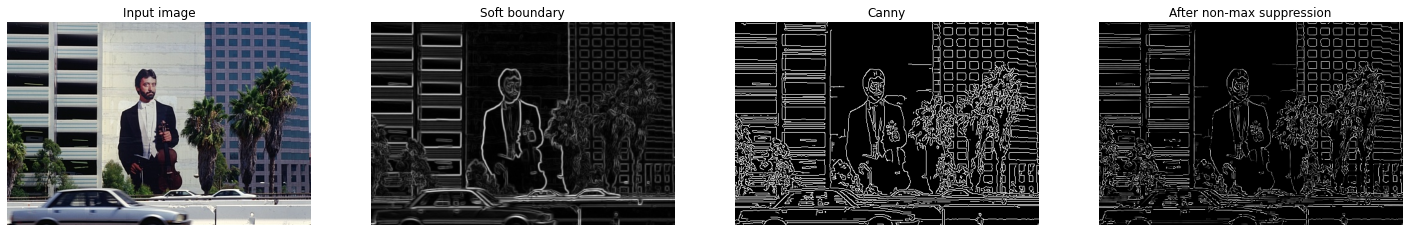

In [28]:
final_gradient_mag , orientation , blur_img= gradientMagnitude(img, 1)

edge , final_image = edgeGradient(blur_img , final_gradient_mag)


plt.figure(figsize = (25, 25))

plt.subplot(1,4,1),plt.imshow(img_display_plt ,cmap = 'gray')
plt.title('Input image')
plt.axis('off')


plt.subplot(1,4,2),plt.imshow(final_gradient_mag ,cmap = 'gray')
plt.title('Soft boundary')
plt.axis('off')


plt.subplot(1,4,3),plt.imshow(edge ,cmap = 'gray')
plt.title('Canny')
plt.axis('off')


plt.subplot(1,4,4),plt.imshow(final_image ,cmap = 'gray')
plt.title('After non-max suppression')
plt.axis('off')
plt.show()

## Subpart 2: Improved Edge Detection (8 points)
Try to improve your results using a set of oriented filters, rather than the simple derivative of Gaussian approach above, including the following functions:
```
def orientedFilterMagnitude(im):
```
Computes the boundary magnitude and orientation using a set of oriented filters, such as elongated Gaussian derivative filters. Explain your choice of filters in the write-up. Use at least four orientations. One way to combine filter responses is to compute a boundary score for each filter (simply by filtering with it) and then use the max and argmax over filter responses to compute the magnitude and orientation for each pixel.
```
def edgeOrientedFilters(im):
```
Similar to Subpart 1, this should call orientedFilterMagnitude, perform the non-maxima suppression, and output the final soft edge map.

In [29]:
def orientedFilterMagnitude(img, sigma):
  '''
  im: input image

  outputs: gradient magnitude and gradient direction of the image
  '''
  ## YOUR CODE HERE
  blur_img = cv2.GaussianBlur(img , (3,3) , sigmaX=sigma)
  # y gradient kernel
  kernely = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
  # x gradient kernel
  kernelx = np.array([[1,0,-1],[1,0,-1],[1,0,-1]])

  # the remaining oriented filters are obtained linear combination of basis filters
  kernel_45 = kernelx*np.cos(np.pi/4) + kernely*np.sin(np.pi/4)
  kernel_135 = kernelx*np.cos(0.75*np.pi) + kernely*np.sin(0.75*np.pi)

  grad_x = cv2.filter2D(blur_img ,cv2.CV_32F,kernelx)
  grad_y  = cv2.filter2D(blur_img ,cv2.CV_32F,kernely)
  # gradient magnitude for x gradient and y gradient
  gradient_mag_x = np.linalg.norm(grad_x, axis = -1)
  gradient_mag_y = np.linalg.norm(grad_y, axis = -1)
  grad_45 = cv2.filter2D(blur_img , cv2.CV_32F , kernel_45)
  grad_135  = cv2.filter2D(blur_img , cv2.CV_32F , kernel_135)

  # fake_sum = grad_x + grad_y
  # cv2.imshow("sum",fake_sum)
  gradient_mag_45 = np.linalg.norm(grad_45, axis = -1)
  gradient_mag_135 = np.linalg.norm(grad_135, axis = -1)

  gradient_oriented = np.zeros((img.shape[0] , img.shape[1]))
  for i in range(img.shape[0]):
      for j in range(img.shape[1]):
          temp = np.zeros(4)
          temp[0] = gradient_mag_x[i][j]
          temp[1] = gradient_mag_y[i][j]
          temp[2] = gradient_mag_45[i][j]
          temp[3] = gradient_mag_135[i][j]
          gradient_oriented[i][j] = np.max(temp )  

  return gradient_oriented ,  blur_img

def edgeOrientedFilters(blur_img , final_gradient_mag):
  '''
  im: input blur image and gradient mag

  output:  canny detection and image afeter suppression
  '''
  edge =cv2.Canny(blur_img ,50,100)
  final_image_oriented_filter = cv2.bitwise_and(final_gradient_mag.astype(np.uint8) , edge)

  return edge , final_image_oriented_filter

Orientation same as Subpart 1


(-0.5, 480.5, 320.5, -0.5)

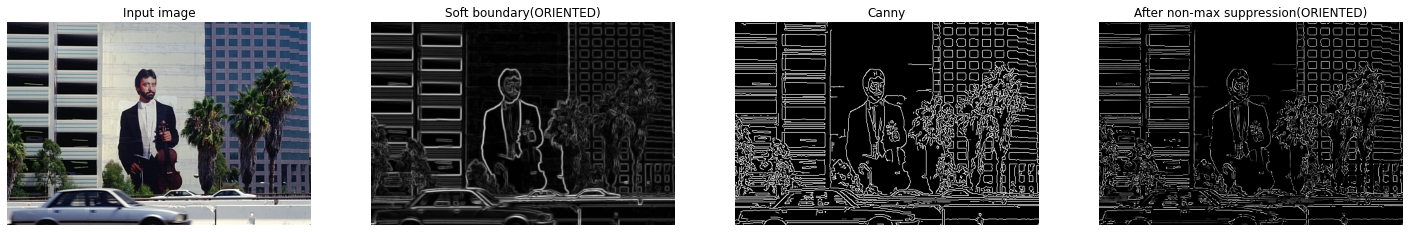

In [30]:
oriented_filter_mag ,  blur_img= orientedFilterMagnitude(img, 1)
print("Orientation same as Subpart 1")

edge , final_image_oriented_filter = edgeOrientedFilters(blur_img , oriented_filter_mag)


plt.figure(figsize = (25, 25))

plt.subplot(1,4,1),plt.imshow(img_display_plt ,cmap = 'gray')
plt.title('Input image')
plt.axis('off')


plt.subplot(1,4,2),plt.imshow(oriented_filter_mag ,cmap = 'gray')
plt.title('Soft boundary(ORIENTED)')
plt.axis('off')


plt.subplot(1,4,3),plt.imshow(edge ,cmap = 'gray')
plt.title('Canny')
plt.axis('off')


plt.subplot(1,4,4),plt.imshow(final_image_oriented_filter,cmap = 'gray')
plt.title('After non-max suppression(ORIENTED)')
plt.axis('off')

## Write-up (9 points)

1.   **(2 points)** Description of any design choices and parameters
2.   **(1 points)** The bank of filters used for Subpart 2 ([plt.imshow with extent](https://stackoverflow.com/questions/13384653/imshow-extent-and-aspect/13390798#13390798) or [cv2.normalize to convert output into grayscale](https://stackoverflow.com/questions/39808545/implement-mat2gray-in-opencv-with-python) may help with visualization)
3.   **(5 points)** Qualitative results: choose five example images; show input images and outputs of each edge detector
4.   **(1 points)** Discuss the quality of your outputs and state one possible way for improvement. Improvements could provide, for example, a better boundary pixel score or a better suppression technique. Your idea could come from a paper you read, but cite any sources of ideas.



## Include write up
1. * The Gaussian kernel size was chosen small, so that we don't loose much of the details.  
  * cv2.CV_32F in the filter2Dfunction instead of cv2.CV_8U so that values don't become clipped due to limit in datatype.
  * The simplest kernel type of [-1,0,1] was chosen to find gradient instead of Sobel of derivative of Gaussian operators.
  * The rest of the filters were chosen using linear combination of basis filters.

2. The normal x and y kernels were used. The kernel45 and kernel135 was chosen as 
     : kernel_x*cos(theta) + kernel_y* sin(theta).

3. [edge examples](https://drive.google.com/drive/folders/1yri1klVI1YkpRvWC4_66FPN2tdgkgUl4?usp=sharing)

4.  * In certain regions the change in intensity is not significant, hence the edge not being detected. 
  * The reflection of the building was not registered due to not having adequate change in albedo.

  * The quality of both linear and orientd filters are visually the same because of using canny reference for non-maxima supression.
  * SUGGESTIOn : Using vairable sigma and threshholding to produce better edges for low resolution images. (SOURCE: AN EFFICIENT APPROACH FOR IMPROVING CANNY EDGE
DETECTION ALGORITHM-
Shokhan M. H.
Department of Computer Science, Al-Anbar University, Iraq)

# Part D: Template Matching (25 points) 

## Overview
The goal of this part is to build a template maching algorithm for where's waldo puzzle. 
The end product should be finding waldo in puzzle images. 


## Data

**WARNING: Colab deletes all files everytime runtime is disconnected. Make sure to re-download the inputs when it happens.**


In [31]:
# Download Data -- run this cell only one time per runtime
!gdown 1_PHimFhPSajbTWzAL6-PwM803uzA7Ymb
!unzip "/content/Part4_data.zip" -d "/content/"

Downloading...
From: https://drive.google.com/uc?id=1_PHimFhPSajbTWzAL6-PwM803uzA7Ymb
To: /content/Part4_data.zip
100% 2.04M/2.04M [00:00<00:00, 230MB/s]
Archive:  /content/Part4_data.zip
replace /content/__MACOSX/._Part4_data? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


## Code

We provide the following functions for plotting your results 


In [32]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt
import copy
from scipy.fft import *

def plot_image(im,title,xticks=[],yticks= [],cv2 = True):
    """
    im :Image to plot
    title : Title of image 
    xticks : List of tick values. Defaults to nothing
    yticks :List of tick values. Defaults to nothing 
    cv2 :Is the image cv2 image? cv2 images are BGR instead of RGB. Default True
    """
    plt.figure()
    plt.imshow(im[:,:,::-1])
    plt.title(title)
    plt.xticks(xticks)
    plt.yticks(yticks)

It is always advised for you to visualize and get familar with waldo and puzzle image. 

Visualize both the waldo and puzzle images.

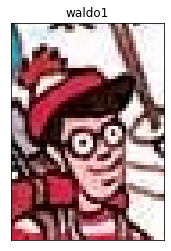

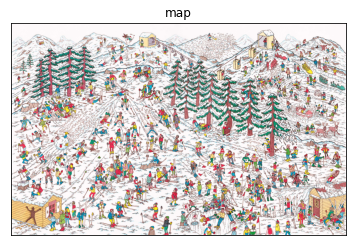

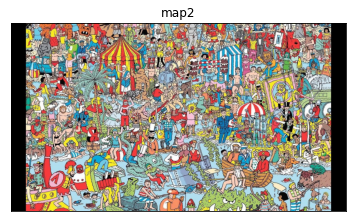

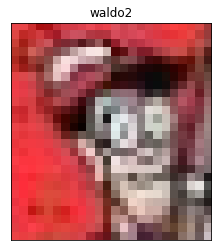

In [33]:
p1_waldo = cv2.imread('/content/Part4_data/puzzle1/waldo.jpg' ,0)
p1_waldo_color = cv2.imread('/content/Part4_data/puzzle1/waldo.jpg' , 1 )
p1_map = cv2.imread('/content/Part4_data/puzzle1/pic1.jpeg' ,0)
p1_map_color = cv2.imread('/content/Part4_data/puzzle1/pic1.jpeg' ,1)

p2_waldo = cv2.imread('/content/Part4_data/puzzle2/waldo.png' , 0)
p2_map = cv2.imread('/content/Part4_data/puzzle2/map.jpg' , 0)
p2_waldo_color = cv2.imread('/content/Part4_data/puzzle2/waldo.png' , 1)
p2_map_color = cv2.imread('/content/Part4_data/puzzle2/map.jpg' , 1)


p2_map_color_copy = copy.deepcopy(p2_map_color)
p1_map_color_copy = copy.deepcopy(p1_map_color)

plot_image(p1_waldo_color , 'waldo1')
plot_image(p1_map_color, 'map')
plot_image(p2_map_color, 'map2')
plot_image(p2_waldo_color, 'waldo2')

plt.show()

### Subpart 1: Template Matching with OpenCV
OpenCV provide Template Matching functions below link. 

https://docs.opencv.org/4.x/d4/dc6/tutorial_py_template_matching.html

You can use this function for implementing simple where's waldo algorithm.

This part helps you to understand the concepts of Template Matching and OpenCV Library. This is just for reference.

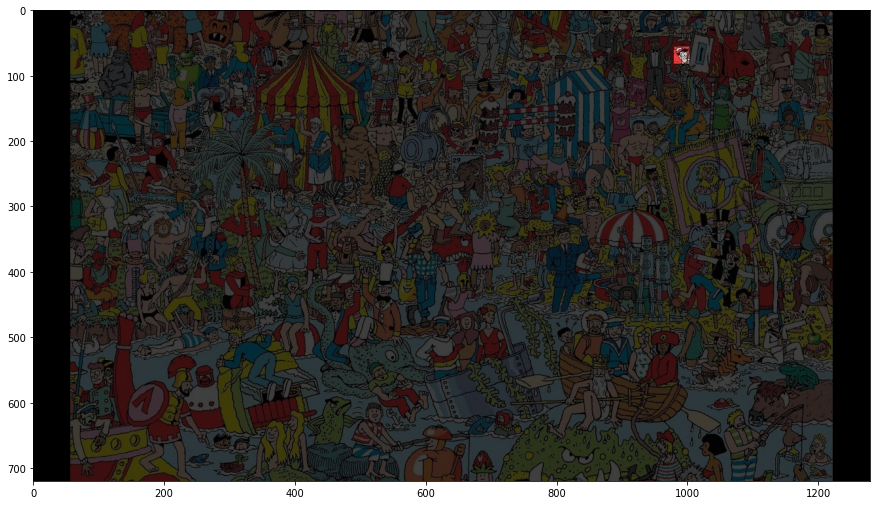

In [34]:
(waldoHeight, waldoWidth) = p2_waldo_color.shape[:2]
result = cv2.matchTemplate(p2_map_color, p2_waldo_color, cv2.TM_CCOEFF)
(_, _, minLoc, maxLoc) = cv2.minMaxLoc(result)

# grab the bounding box of waldo and extract him from the puzzle image
topLeft = maxLoc

botRight = (topLeft[0] + waldoWidth, topLeft[1] + waldoHeight)
roi = p2_map_color[topLeft[1] : botRight[1], topLeft[0] : botRight[0]]

# construct a darkened transparent 'layer' to darken everything
# in the map except for Waldo
mask = np.zeros(p2_map_color.shape, dtype = "uint8")
p2_map_color = cv2.addWeighted(p2_map_color, 0.25, mask, 0.75, 0)

p2_map_color[topLeft[1] : botRight[1], topLeft[0] : botRight[0]] = roi

# display the images
result_rgb = cv2.cvtColor(p2_map_color, cv2.COLOR_RGB2BGR)
plt.figure(figsize = (15, 15))
plt.imshow(result_rgb)

### Subpart 2: Template Matching from Scratch

Implement the Sum of Squared Distance (SSD) template matching algorithm from scratch (Don't use cv2.matchTemplate).

Then, show the results of where's waldo for two puzzle images.

Hints: You can borrow the codes from Part1 and Part2. Please read methods for matching with filters in Lecture Slide.  

height 61 and width 43 of waldo


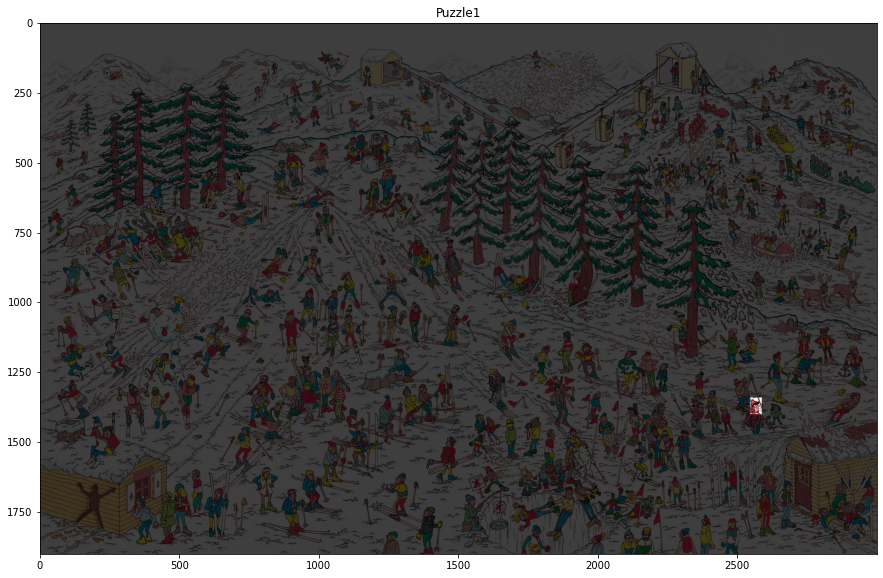

In [35]:
black_image = np.zeros((p1_map.shape[0]  - p1_waldo.shape[0] + 1, p1_map.shape[1] - p1_waldo.shape[1] +1) )
for i in range(p1_map.shape[0] - p1_waldo.shape[0]+1):
    for j in range(p1_map.shape[1] - p1_waldo.shape[1]+1):
        subtract = p1_waldo  -  p1_map[i: i+ p1_waldo.shape[0] , j : j+ p1_waldo.shape[1]] 

        result = np.sum(subtract**2)
        black_image[i , j] = result 


minLoc = np.unravel_index(black_image.argmin(), black_image.shape)



# grab the bounding box of waldo and extract him from the puzzle image
topLeft = minLoc

h,w = p1_waldo.shape
print(f'height {h} and width {w} of waldo')
# grab the bounding box of waldo and extract him from the puzzle image

botRight = (topLeft[1] + w, topLeft[0] + h)

roi = p1_map_color_copy[topLeft[0] : botRight[1], topLeft[1] : botRight[0]]

# construct a darkened transparent 'layer' to darken everything
# in the map except for Waldo
mask = np.zeros(p1_map_color_copy.shape, dtype = "uint8")
p1_map_color_copy = cv2.addWeighted(p1_map_color_copy, 0.25, mask, 0.75, 0)

p1_map_color_copy[topLeft[0] : botRight[1], topLeft[1] : botRight[0]] = roi

# display the images
result_rgb = cv2.cvtColor(p1_map_color_copy, cv2.COLOR_RGB2BGR)
plt.figure(figsize = (15, 15))
plt.title('Puzzle1')
plt.imshow(result_rgb)

height26 and width 24 of waldo


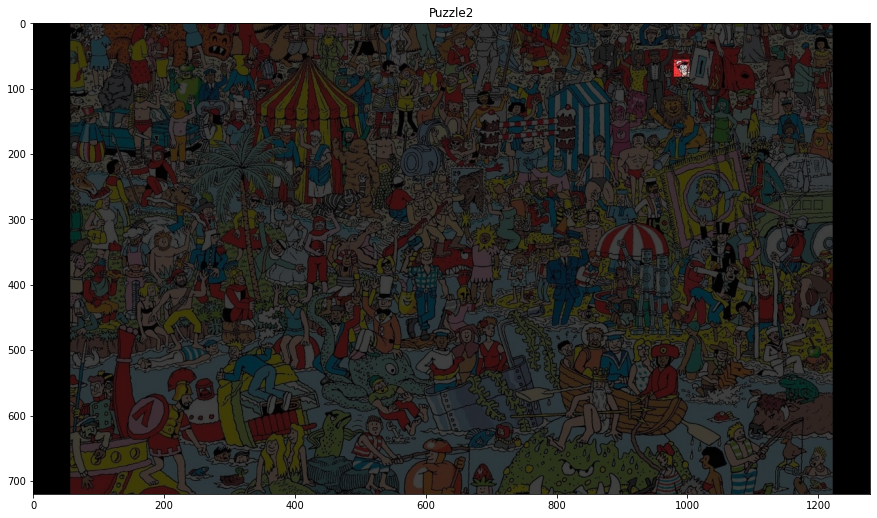

In [36]:
black_image_2 = np.zeros((p2_map.shape[0]  - p2_waldo.shape[0] + 1, p2_map.shape[1] - p2_waldo.shape[1] +1) )

for i in range(p2_map.shape[0] - p2_waldo.shape[0]+1):
    for j in range(p2_map.shape[1] - p2_waldo.shape[1]+1):
        subtract = p2_waldo_color  -  p2_map_color_copy[i: i+ p2_waldo.shape[0] , j : j+ p2_waldo.shape[1]] 

        result = np.sum(subtract**2)
        black_image_2[i , j] = result 


minLoc = np.unravel_index(black_image_2.argmin(), black_image_2.shape)


# grab the bounding box of waldo and extract him from the puzzle image
topLeft = minLoc
# print(topLeft)
h,w = p2_waldo.shape
print(f'height{h} and width {w} of waldo')
# grab the bounding box of waldo and extract him from the puzzle image

botRight = (topLeft[1] + w, topLeft[0] + h)

roi = p2_map_color_copy[topLeft[0] : botRight[1], topLeft[1] : botRight[0]]

# construct a darkened transparent 'layer' to darken everything
# in the map except for Waldo
mask = np.zeros(p2_map_color_copy.shape, dtype = "uint8")
p2_map_color_copy = cv2.addWeighted(p2_map_color_copy, 0.25, mask, 0.75, 0)

p2_map_color_copy[topLeft[0] : botRight[1], topLeft[1] : botRight[0]] = roi

# display the images
result_rgb = cv2.cvtColor(p2_map_color_copy, cv2.COLOR_RGB2BGR)
plt.figure(figsize = (15, 15))
plt.title('Puzzle2')
plt.imshow(result_rgb)